In [16]:
import wfdb
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats as set_fmt
set_fmt('svg')
import warnings  
warnings.filterwarnings("ignore", category=DeprecationWarning)

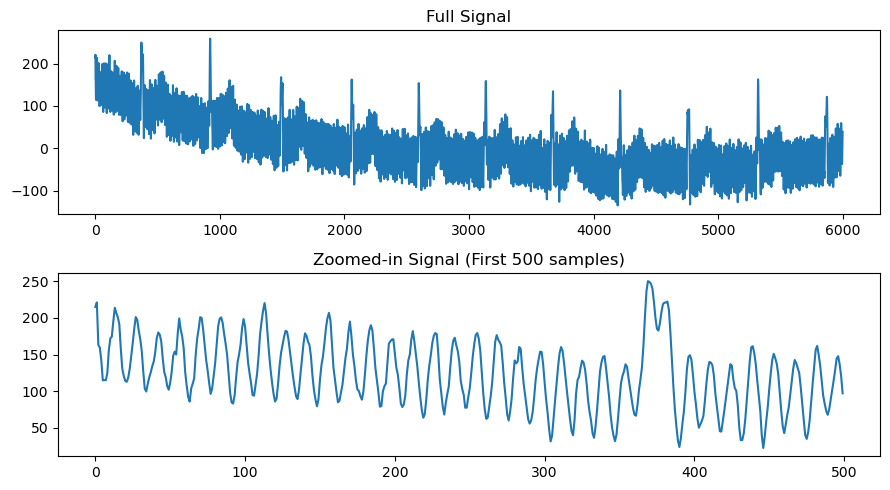

In [10]:
# Sampling frequency
fs = 720

# Load the .mat file
ds = io.loadmat('sampleECG3.mat')


# Access the signal data from the dataset
sig = ds['signal']  # Assuming 'signal' is the correct key for the ECG data

# Plot the signal
plt.figure(figsize=(9, 5))

# First subplot: Full signal
plt.subplot(2, 1, 1)
plt.plot(sig)
plt.title('Full Signal')

# Second subplot: Zoomed-in version (first 500 samples)
plt.subplot(2, 1, 2)
plt.plot(sig[:500])
plt.title('Zoomed-in Signal (First 500 samples)')

plt.tight_layout()
plt.show()


# Design filter 
- 1. high-pass filter
- 2. low-pass filter

In [11]:
# Design filter to remove baseline wander (high-pass filter)
b, a = signal.butter(N=3, Wn=0.5/(fs/2), btype='high')  # remove baseline wander
sig_new_baseline = signal.filtfilt(b, a, sig, axis=0)

# Design filter to remove high-frequency noise (low-pass filter)
b2, a2 = signal.butter(N=3, Wn=20/(fs/2), btype='low')  # remove high frequency noises
sig_new_powerline = signal.filtfilt(b2, a2, sig_new_baseline, axis=0)


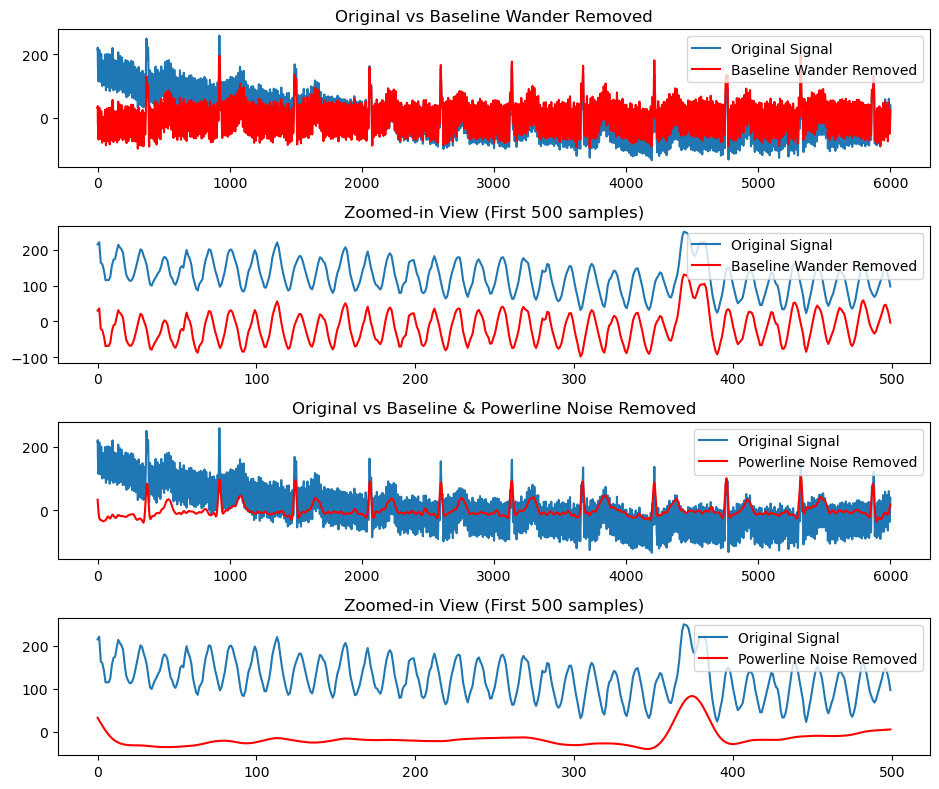

In [12]:
# Plot original signal vs baseline wander removed
plt.figure(figsize=(9.5,8))

plt.subplot(4, 1, 1)
plt.plot(sig, label='Original Signal')
plt.plot(sig_new_baseline, 'r', label='Baseline Wander Removed')
plt.title('Original vs Baseline Wander Removed')
plt.legend()

# Zoomed-in view
plt.subplot(4, 1, 2)
plt.plot(sig[:500], label='Original Signal')
plt.plot(sig_new_baseline[:500], 'r', label='Baseline Wander Removed')
plt.title('Zoomed-in View (First 500 samples)')
plt.legend()

# Plot original signal vs both baseline wander and high-frequency noise removed
plt.subplot(4, 1, 3)
plt.plot(sig, label='Original Signal')
plt.plot(sig_new_powerline, 'r', label='Powerline Noise Removed')
plt.title('Original vs Baseline & Powerline Noise Removed')
plt.legend()

# Zoomed-in view
plt.subplot(4, 1, 4)
plt.plot(sig[:500], label='Original Signal')
plt.plot(sig_new_powerline[:500], 'r', label='Powerline Noise Removed')
plt.title('Zoomed-in View (First 500 samples)')
plt.legend()

plt.tight_layout()
plt.show()

# Design filter
- bandpass filter --->  to remove both baseline wander and powerline noise

In [13]:
### Design bandpass filter to remove both baseline wander and powerline noise at the same time
b, a = signal.butter(N=3, Wn=np.array([0.5, 40])/(fs/2), btype='bandpass')  # remove both baseline wander and powerline noise
sig_new_both = signal.filtfilt(b, a, sig, axis=0)

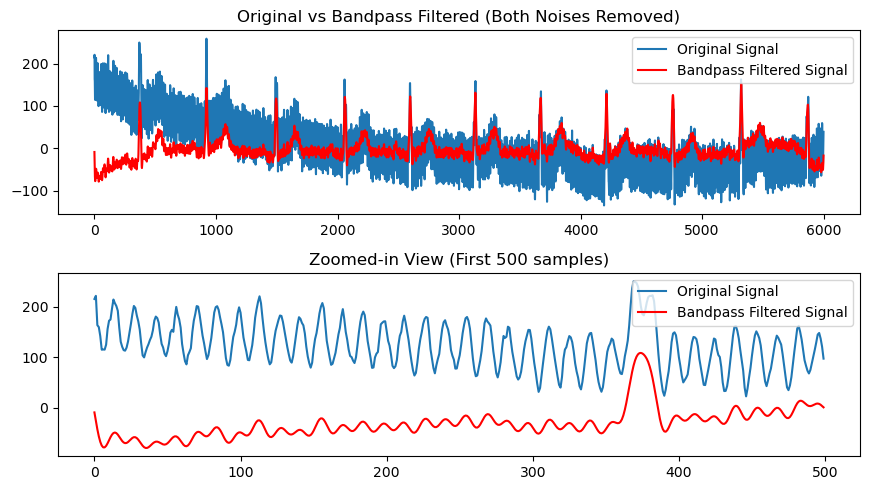

In [14]:
# Plot original signal vs filtered signal (bandpass filter)
plt.figure(figsize=(8.8,5))

plt.subplot(2, 1, 1)
plt.plot(sig, label='Original Signal')
plt.plot(sig_new_both, 'r', label='Bandpass Filtered Signal')
plt.title('Original vs Bandpass Filtered (Both Noises Removed)')
plt.legend()

# Zoomed-in view
plt.subplot(2, 1, 2)
plt.plot(sig[:500], label='Original Signal')
plt.plot(sig_new_both[:500], 'r', label='Bandpass Filtered Signal')
plt.title('Zoomed-in View (First 500 samples)')
plt.legend()

plt.tight_layout()
plt.show()